# Dinkey Creek

#### Dan Krofcheck
Krofcheck@Gmail.com 
 
#### Project description -- working with the Dinkey Creek watershed landscape, initially paramterized by Shuang. Ecoregion creation and model paramterization (including the addition of two shrub species and a shrub functional type) are described in this notebook, as well as the creation of a set of functions to aid in the Century succession extension calibration / paramterization (given the move to Century v4.0 in Landis-II). Ultimately this notebook will be split into a description of project specific work, and a collection of Landis-II tools which will be used in subsequent modeling studies.


In [1]:
# Specify inline plots for notebook
%matplotlib inline

# Libraries -- overkill for the time being
import matplotlib.pyplot as plt
from lxml import etree
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import pandas as pd
import seaborn as sns
import numpy as np
import os, datetime
import fiona
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from descartes import PolygonPatch
from itertools import chain

# Set working dir
wrkDir = 'C:/Research/Dinkey_Creek/GIS_Data_And_Maps/'


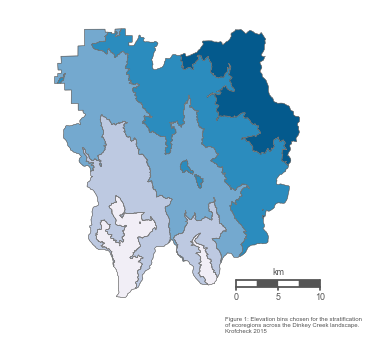

In [19]:
shp = fiona.open(wrkDir + 'DinkeyElevationShp.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, frameon = False)
ax1 = fig.add_subplot(111, frameon = False)
ax2 = fig.add_subplot(111, frameon = False)
ax3 = fig.add_subplot(111, frameon = False)
ax4 = fig.add_subplot(111, frameon = False)

m = Basemap(llcrnrlon=-119.4,llcrnrlat=36.85,urcrnrlon=-118.95,urcrnrlat=37.2,
             resolution='i', projection='tmerc', lat_0 = 37.1, lon_0 = -119.3)
    
m.readshapefile(wrkDir + 'DinkeyElevationShp', 'Elevation',
    color='grey',
    zorder=2)

# set up a map dataframe
elev = []
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.Elevation]})
for shape in enumerate(df_map['poly']):
    keys, values = m.Elevation_info[shape[0]].keys(),m.Elevation_info[shape[0]].values()
    elev.append(values[1])
df_map['Elevation'] = elev
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x, ec='#787878', lw=.25))

# Paint the features
ax.add_collection(PatchCollection(df_map.patches[df_map.Elevation == 'A'], facecolor= '#f1eef6'))
ax1.add_collection(PatchCollection(df_map.patches[df_map.Elevation == 'B'], facecolor= '#bdc9e1'))
ax2.add_collection(PatchCollection(df_map.patches[df_map.Elevation == 'C'], facecolor= '#74a9cf'))
ax3.add_collection(PatchCollection(df_map.patches[df_map.Elevation == 'D'], facecolor= '#2b8cbe'))
ax4.add_collection(PatchCollection(df_map.patches[df_map.Elevation == 'E'], facecolor= '#045a8d'))

smallprint = ax.text(
    .65, 0,
    '''Figure 1: Elevation bins chosen for the stratification \nof ecoregions across the Dinkey Creek landscape.\nKrofcheck 2015''',
    size=6,
    color='#555555',
    transform=ax.transAxes)

# Draw a map scale
m.drawmapscale(
    coords[0] + 0.3, coords[1] + 0.015,
    coords[0], coords[1],
    10.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
plt.show()

### Ecoregion Creation
#### The Dinkey Creek landsacpe is characterized by an elevation gradient, increasing along a southwest to northeast transect over ~300 - 3000 meters (Fig 1). Initially, we split the landscape into five elevation bins, which roughly corresponded with broad patterns in precipitation and temperature trends across the watershed (Fig 2). 

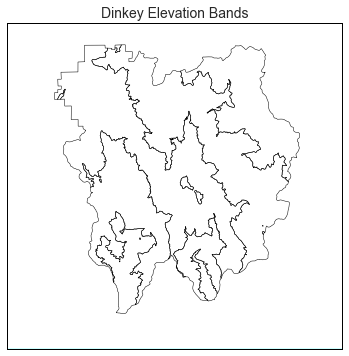

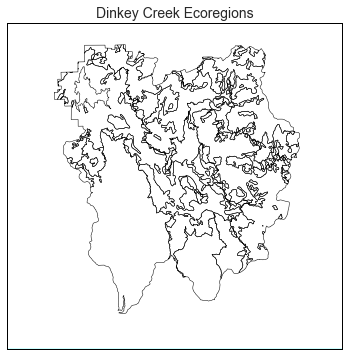

In [16]:
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
map = Basemap(llcrnrlon=-119.4,llcrnrlat=36.85,urcrnrlon=-118.95,urcrnrlat=37.2,
             resolution='i', projection='tmerc', lat_0 = 37.1, lon_0 = -119.3)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
map.drawcoastlines()
map.readshapefile(wrkDir + 'DinkeyElevationShp', 'Elevation')

plt.title('Fig. 1: Dinkey Elevation Bands', fontsize = 14)

plt.figure(figsize=(6,6))
map = Basemap(llcrnrlon=-119.4,llcrnrlat=36.85,urcrnrlon=-118.95,urcrnrlat=37.2,
             resolution='i', projection='tmerc', lat_0 = 37.1, lon_0 = -119.3)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
map.drawcoastlines()
map.readshapefile(wrkDir + 'Ecoregions_latlong', 'Ecoregions')
plt.title('Fig. 2: Dinkey Creek Ecoregions', fontsize = 14)
plt.show()
